In [88]:
!pip install pyforest



In [89]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [90]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


In [91]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sree nikshitha\Downloads\upifrauddetection.csv")


In [92]:
pip install pyforest


Note: you may need to restart the kernel to use updated packages.


In [93]:
import pyforest #numpy,pandas,matplotlib and seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [94]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [95]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [96]:
df.describe()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
count,647.000000,647.000000,647.000000,647.000000,647.000000
mean,3.564142,5.014668,15.717156,128.839753,0.239567
std,6.454543,56.375914,8.218122,364.995747,0.427150
min,0.000000,-99.470000,1.000000,0.120000,0.000000
25%,1.000000,-42.355000,8.500000,17.155000,0.000000
50%,2.000000,8.380000,16.000000,35.000000,0.000000
75%,3.000000,52.290000,23.000000,74.770000,0.000000
max,50.000000,99.450000,29.000000,4883.620000,1.000000


In [97]:
df.duplicated().sum()

0

In [98]:
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [99]:
df.shape

(647, 20)

In [100]:
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

In [ ]:
df.nunique()

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [102]:
df = pd.read_csv(r"C:\Users\sree nikshitha\Downloads\upifrauddetection.csv")

# Drop columns with unique values without reassigning
df.drop(columns=[col for col in df.columns if df[col].nunique() == len(df)], inplace=True)

# Display the remaining columns
print(df.columns)


Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud'],
      dtype='object')


In [103]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,25/06/23,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,28/01/24,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,21/06/23,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [104]:
# Group by 'Transaction_Type' and sum the 'fraud' column
fraud = df.groupby('Transaction_Type')['fraud'].sum().sort_values(ascending=False)

# Display the result
print(fraud)


Transaction_Type
Bank Transfer    27
Subscription     25
Investment       23
Refund           22
Bill Payment     21
Other            21
Purchase         16
Name: fraud, dtype: int64


In [105]:
# Reformat the grouped data into a DataFrame for displaying similar to df.head()
fraud_df = pd.DataFrame(fraud).reset_index()

# Rename the columns for better readability
fraud_df.columns = ['Transaction Type', 'Fraudulent Transactions']

# Display the result in a table format
fraud_df.head()


,Transaction Type,Fraudulent Transactions
0,Bank Transfer,27
1,Subscription,25
2,Investment,23
3,Refund,22
4,Bill Payment,21


In [ ]:
# Create a DataFrame for fraudulent transactions by Transaction_Type
fraud_df = pd.DataFrame(fraud).reset_index()
fraud_df.columns = ['Transaction_Type', 'Fraudulent Transactions']

# Merge this DataFrame with the original DataFrame (df)
df_merged = df.merge(fraud_df, on='Transaction_Type', how='left')

# Display the first few rows of the merged DataFrame
df_merged.head()


,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Fraudulent Transactions
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,22
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,27
2,25/06/23,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,27
3,28/01/24,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,25
4,21/06/23,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,23


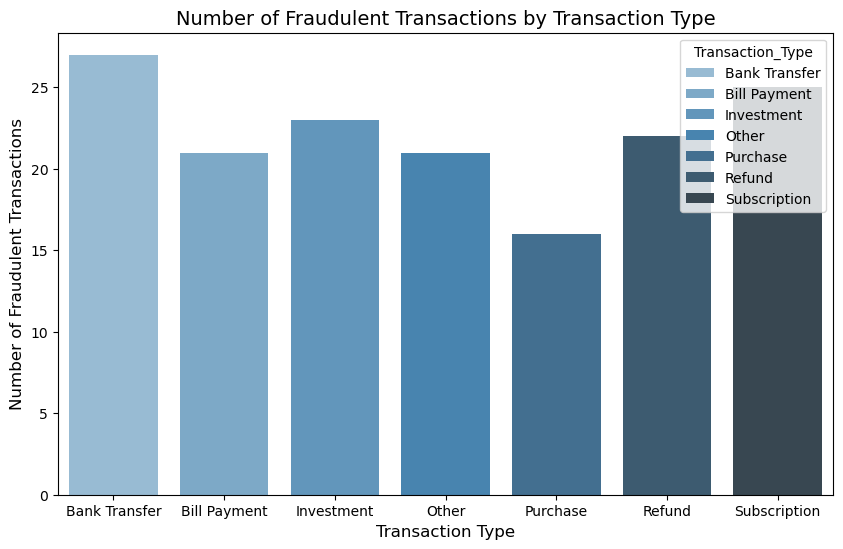

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Transaction_Type and count fraudulent transactions
fraud_by_type = df.groupby('Transaction_Type')['fraud'].sum().reset_index()

# Plot using seaborn (future-proof)
plt.figure(figsize=(10,6))
sns.barplot(
    x='Transaction_Type',
    y='fraud',
    hue='Transaction_Type',
    data=fraud_by_type,
    palette='Blues_d',
    legend=True
)

# Add labels and title
plt.title('Number of Fraudulent Transactions by Transaction Type', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)

# Display the plot
plt.show()


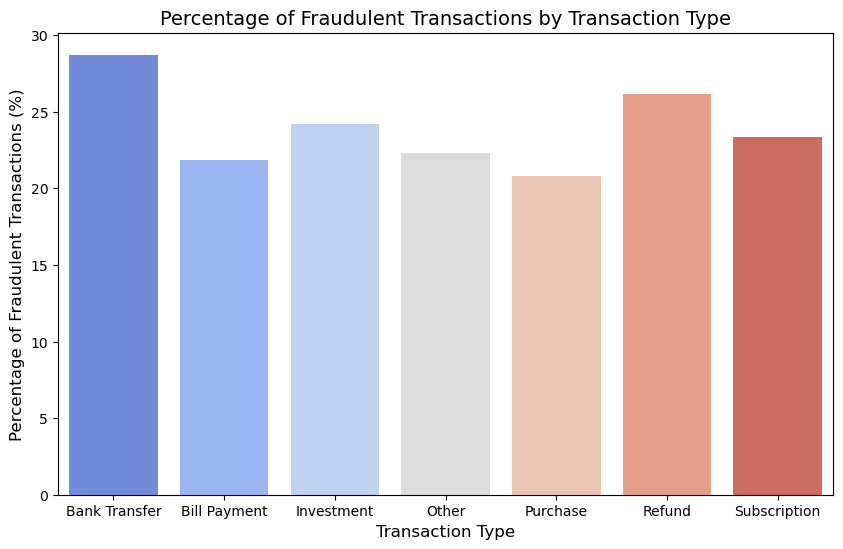

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of fraudulent transactions by Transaction_Type
fraud_percentage = df.groupby('Transaction_Type')['fraud'].mean() * 100

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x=fraud_percentage.index,
    y=fraud_percentage.values,
    hue=fraud_percentage.index,  # to avoid FutureWarning
    palette='coolwarm',
    legend=False
)

# Labels and title
plt.title('Percentage of Fraudulent Transactions by Transaction Type', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Percentage of Fraudulent Transactions (%)', fontsize=12)

# Display the plot
plt.show()


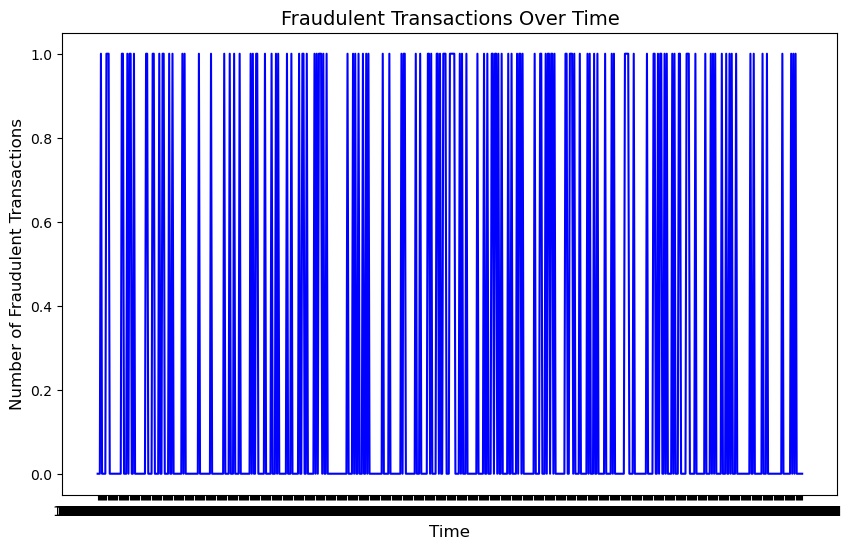

In [109]:
fraud_by_time = df.groupby('Time')['fraud'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Time', y='fraud', data=fraud_by_time, color='blue')
plt.title('Fraudulent Transactions Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.show()


In [110]:
df_encoded = pd.get_dummies(df, columns=['Transaction_Type'], drop_first=True)


In [111]:
fraud_rate = df.groupby('Transaction_Type')['fraud'].mean()
df['fraud_rate_by_type'] = df['Transaction_Type'].map(fraud_rate)


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Drop only existing columns
cols_to_drop = [
    'Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID', 
    'Device_ID', 'Transaction_City', 'Transaction_State', 'IP_Address'
]
df_model = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Define features and target
if 'fraud' not in df_encoded.columns:
    raise KeyError("Column 'fraud' not found in dataset. Please check the exact target column name.")
    
X = df_encoded.drop(columns=['fraud'])
y = df_encoded['fraud']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       144
           1       0.90      0.75      0.82        51

    accuracy                           0.91       195
   macro avg       0.91      0.86      0.88       195
weighted avg       0.91      0.91      0.91       195



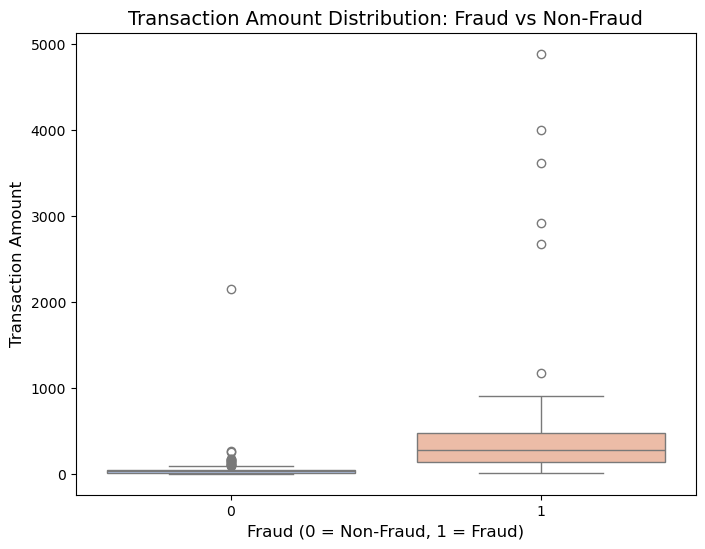

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(
    x='fraud',
    y='amount',
    data=df,
    hue='fraud',           
    palette='coolwarm',
    legend=False           )
plt.title('Transaction Amount Distribution: Fraud vs Non-Fraud', fontsize=14)
plt.xlabel('Fraud (0 = Non-Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.show()


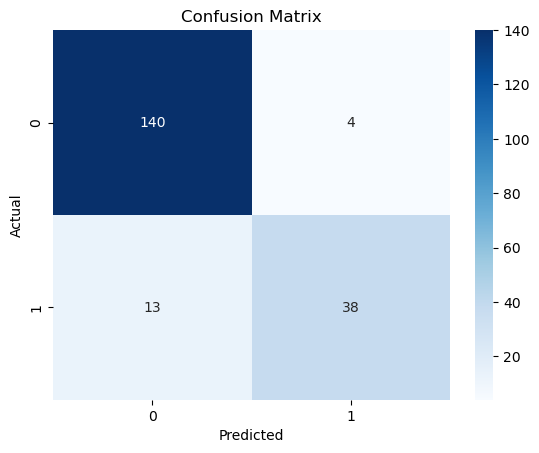

In [114]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [116]:
import pandas as pd

def is_fraud(tx):
    amount = float(tx.get("amount", 0))
    remarks = str(tx.get("remarks", "")).lower()
    device = str(tx.get("device", "")).lower()
    channel = str(tx.get("channel", "")).lower()
    payee = str(tx.get("payee_id", "")).lower()
    payer = str(tx.get("payer_id", "")).lower()
    
    score = 0

    # ---- SIMPLE RULES ----
    if amount > 20000: score += 1
    if amount > 5000: score += 1
    if "refund" in remarks or "verify" in remarks or "otp" in remarks: score += 1
    if "new" in device or "unregistered" in device: score += 1
    if "p2m" in channel or "merchant" in channel: score += 1
    if "shop" in payee or "deal" in payee or "paytm" in payee: score += 1

    # ---- STRONGER RULE: unexpected/unknown payer (weight 2) ----
    user_ids = ["gorthimadhuri@oksbi"]  # add user's own UPI IDs here
    if payer not in user_ids and payer != "" and payer != payee:
        score += 2  # WAS +1; now +2 to ensure unknown incoming credit is flagged

    # threshold (score >=2 => Fraud)
    return "Fraud" if score >= 2 else "Not Fraud"


transactions = [
    {
        "transaction_id": "530359451872",
        "amount": 5000,
        "payer_id": "gorthimadhuri@oksbi",
        "payee_id": "maraganir@oksbi",
        "time": "2025-10-30T11:19:00",
        "device": "mobile",
        "remarks": "UPI Transfer",
        "channel": "GooglePay"
    },
    {
        "transaction_id": "527082504296",
        "amount": 312.83,
        "payer_id": "jarmyjar@icici",
        "payee_id": "gorthimadhuri@oksbi",
        "time": "2025-09-27T19:49:00",
        "device": "mobile",
        "remarks": "Jar payout",
        "channel": "GooglePay"
    },
    {
        "transaction_id": "284651826833",
        "amount": 1563.60,
        "payer_id": "paytm-76208552@ptybl",  
        "payee_id": "gorthimadhuri@oksbi",
        "time": "2025-05-08T23:34:00",
        "device": "mobile",
        "remarks": "Unknown credit received",
        "channel": "GooglePay"
    },
    {
        "transaction_id": "999888777666",
        "amount": 48999,
        "payer_id": "arunk123@oksbi",
        "payee_id": "shopdeal-pay1122@okaxis",
        "time": "2025-11-20T02:43:00",
        "device": "new_device_unregistered",
        "remarks": "Refund Processing",
        "channel": "UPI-P2M"
    }
]

df = pd.DataFrame(transactions)
df["prediction"] = df.apply(is_fraud, axis=1)
print(df)


  transaction_id    amount              payer_id                 payee_id  \
0   530359451872   5000.00   gorthimadhuri@oksbi          maraganir@oksbi   
1   527082504296    312.83        jarmyjar@icici      gorthimadhuri@oksbi   
2   284651826833   1563.60  paytm-76208552@ptybl      gorthimadhuri@oksbi   
3   999888777666  48999.00        arunk123@oksbi  shopdeal-pay1122@okaxis   

                  time                   device                  remarks  \
0  2025-10-30T11:19:00                   mobile             UPI Transfer   
1  2025-09-27T19:49:00                   mobile               Jar payout   
2  2025-05-08T23:34:00                   mobile  Unknown credit received   
3  2025-11-20T02:43:00  new_device_unregistered        Refund Processing   

     channel prediction  
0  GooglePay  Not Fraud  
1  GooglePay      Fraud  
2  GooglePay      Fraud  
3    UPI-P2M      Fraud  


In [121]:
import pandas as pd
from datetime import datetime

# -----------------------------
# LOAD YOUR DATASET
# -----------------------------
df = pd.read_csv(r"C:\Users\sree nikshitha\Downloads\upifrauddetection.csv")

# -----------------------------
# FUNCTION: CALCULATE RULE SCORE
# -----------------------------
def calculate_rule_score(row):
    score = 0
    
    # Rule 1: High amount
    if row["amount"] > 25000:
        score += 3

    # Rule 2: Suspicious devices
    if row["device"] in ["new_device", "unknown_device", "new_device_unregistered"]:
        score += 3

    # Rule 3: Suspicious remarks / random people paying
    suspicious_keywords = ["refund", "unknown", "payout", "lottery", "won", "credit received"]
    if any(word.lower() in str(row["remarks"]).lower() for word in suspicious_keywords):
        score += 2

    # Rule 4: Night-time transactions
    t = datetime.fromisoformat(row["time"])
    if 0 <= t.hour <= 5:
        score += 1

    # Rule 5: Random People Paying (UPI handles very mismatched)
    if "paytm" in row["payer_id"] or "random" in row["remarks"].lower():
        score += 2

    return score

# -----------------------------
# APPLY RULES TO DATASET
# -----------------------------
df["rule_score"] = df.apply(calculate_rule_score, axis=1)
df["fraud"] = (df["rule_score"] >= 3).astype(int)

# -----------------------------
# TESTING WITH GIVEN 4 EXAMPLES
# -----------------------------
test_data = [
    {
        "transaction_id": "530359451872",
        "amount": 5000,
        "payer_id": "gorthimadhuri@oksbi",
        "payee_id": "maraganir@oksbi",
        "time": "2025-10-30T11:19:00",
        "device": "mobile",
        "remarks": "UPI Transfer",
        "channel": "GooglePay"
    },
    {
        "transaction_id": "527082504296",
        "amount": 312.83,
        "payer_id": "jarmyjar@icici",
        "payee_id": "gorthimadhuri@oksbi",
        "time": "2025-09-27T19:49:00",
        "device": "mobile",
        "remarks": "Jar payout",
        "channel": "GooglePay"
    },
    {
        "transaction_id": "284651826833",
        "amount": 1563.60,
        "payer_id": "paytm-76208552@ptybl",  
        "payee_id": "gorthimadhuri@oksbi",
        "time": "2025-05-08T23:34:00",
        "device": "mobile",
        "remarks": "Unknown credit received",
        "channel": "GooglePay"
    },
    {
        "transaction_id": "999888777666",
        "amount": 48999,
        "payer_id": "arunk123@oksbi",
        "payee_id": "shopdeal-pay1122@okaxis",
        "time": "2025-11-20T02:43:00",
        "device": "new_device_unregistered",
        "remarks": "Refund Processing",
        "channel": "UPI-P2M"
    }
]

test_df = pd.DataFrame(test_data)
test_df["rule_score"] = test_df.apply(calculate_rule_score, axis=1)
test_df["fraud"] = (test_df["rule_score"] >= 3).astype(int)

print(test_df[["transaction_id", "amount", "remarks", "rule_score", "fraud"]])


KeyError: 'device'